In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import nltk
import re

In [20]:
df_fake=pd.read_csv('Fake.csv')
df_real=pd.read_csv('True.csv')

df_fake['label']=0
df_real['label']=1

df=pd.concat([df_fake,df_real], axis=0)
df=df.sample(frac=1).reset_index(drop=True)
df=df[['title','text','label']]

In [21]:
def clean_text(text):
    text=text.lower()
    text=re.sub(r'\[.*?\]','',text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    return text


df['text']=df['text'].apply(clean_text)

In [22]:
x=df['text']
y=df['label']
print(df['label'].value_counts())

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


label
0    23481
1    21417
Name: count, dtype: int64


In [23]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = vectorizer.fit_transform(x_train)
tfidf_test = vectorizer.transform(x_test)


model=PassiveAggressiveClassifier(max_iter=1000)
model.fit(tfidf_train,y_train)

Accuracy:  0.9944320712694877


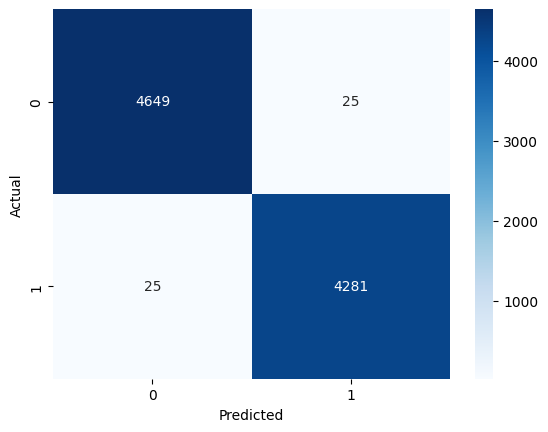

In [26]:
model = PassiveAggressiveClassifier(max_iter=1000)
model.fit(tfidf_train, y_train)



y_pred=model.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print("Accuracy: ",score)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [27]:
def predict_news(news):
    news = clean_text(news)
    vectorized_news = vectorizer.transform([news])
    pred = model.predict(vectorized_news)
    return "Real" if pred[0] == 1 else "Fake"

# Test
predict_news("Breaking news: Scientists discover a new planet in our solar system.")


'Fake'